In [1]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from statistics import mean
from numpy.linalg import inv
import numpy as np 
import math
import random



#loading in images
CerealImages = ["cereal.jpg","cereal_r.jpg","cereal_l.jpg","cereal_tr.jpg","cereal_tl.jpg" ]
Images = [cv2.imread(CerealImages[i],0) for i in range(5)]


#1.1- Matching

def Lowes_Matching(First_Image,Second_Image):
    my_SIFT_instance = cv2.SIFT_create()
    KeyPoint_1, Descriptors_1 = my_SIFT_instance.detectAndCompute(First_Image,None) 
    KeyPoint_2, Descriptors_2 = my_SIFT_instance.detectAndCompute(Second_Image,None)
    First_Image = cv2.drawKeypoints(First_Image,KeyPoint_1,np.array([]))
    Second_Image = cv2.drawKeypoints(Second_Image,KeyPoint_2,np.array([]))
    
    Matcher =  cv2.BFMatcher()
    Found_Matches = Matcher.knnMatch(Descriptors_1,Descriptors_2,k=2)
    lowe_Found_Matches = []
    for i,j in Found_Matches:
        if (i.distance/j.distance) < .80:
            lowe_Found_Matches.append(i)
    return [[KeyPoint_1,KeyPoint_2], [Descriptors_1,Descriptors_2], lowe_Found_Matches]


#1.2 - Affine Transform
def Affine_Transform(Image,picture): 
    Rotational_Matrix = cv2.getRotationMatrix2D((Image.shape[1]/2, Image.shape[0]/2),20,.6)
    Descriptos_Warp = np.zeros(Image.shape, dtype = 'uint8')
    Descriptos_Warp = cv2.warpAffine(Image, Rotational_Matrix, (Image.shape[1], Image.shape[0]))
    KeyPoint, Descriptors, Found_Matches = Lowes_Matching(Image,Descriptos_Warp)
    Points_Refernce = np.float32([KeyPoint[0][i.queryIdx].pt for i in Found_Matches]).reshape(-1,1,2)
    Points_image = np.float32([KeyPoint[1][i.trainIdx].pt for i in Found_Matches]).reshape(-1,1,2)
    Affine_Transform_mat,_ = cv2.estimateAffinePartial2D(Points_Refernce,Points_image)
    New_Image = cv2.imread(picture)
    
    for i in range(New_Image.shape[1]): 
        for j in range(New_Image.shape[0]): 
            New_Image[j,i] = [New_Image[j,i][0] + 10, New_Image[j,i][1] + 10, New_Image[j,i][2] + 10]

    ShowOnScreen = Descriptos_Warp.copy()        
    Testing_Image = []
    Testing_Image = cv2.warpAffine(New_Image, Affine_Transform_mat, (New_Image.shape[1], New_Image.shape[0]))
    Testing_Image = cv2.cvtColor(Testing_Image, cv2.COLOR_BGR2RGB)
    Descriptos_Warp = cv2.cvtColor(Descriptos_Warp, cv2.COLOR_GRAY2RGB)
   
    for i in range(Descriptos_Warp.shape[1]): 
        for j in range(Descriptos_Warp.shape[0]):
            if all(Descriptos_Warp[j,i]) != False: 
                 Descriptos_Warp[j,i] = Testing_Image[j,i]
    plot, PlotAxis = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    PlotAxis[0].set_title("The Reference Img")
    PlotAxis[0].imshow(Image, cmap = "gray")
    PlotAxis[1].set_title("The Test Img")
    PlotAxis[1].imshow(ShowOnScreen, cmap = "gray")
    PlotAxis[2].set_title("The Overlaid Img")
    PlotAxis[2].imshow(Descriptos_Warp)


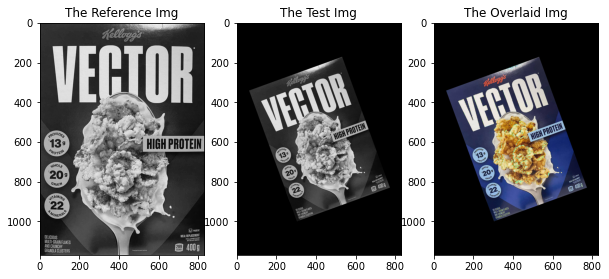

In [2]:
Affine_Transform(Images[0], "cereal.jpg")

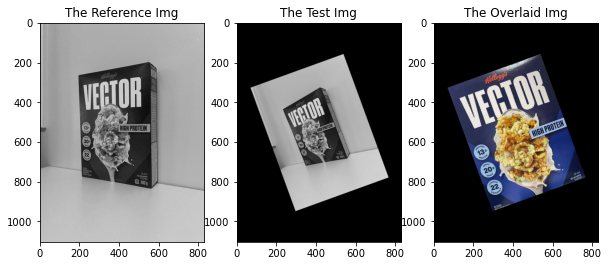

In [3]:
Affine_Transform(Images[1], "cereal.jpg")

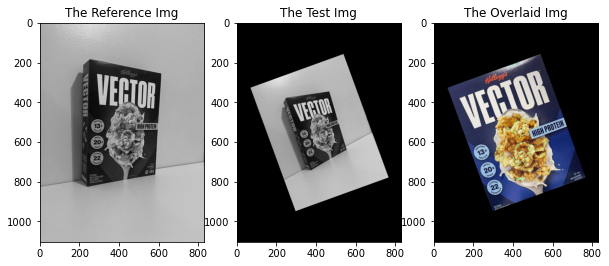

In [4]:
Affine_Transform(Images[2], "cereal.jpg")

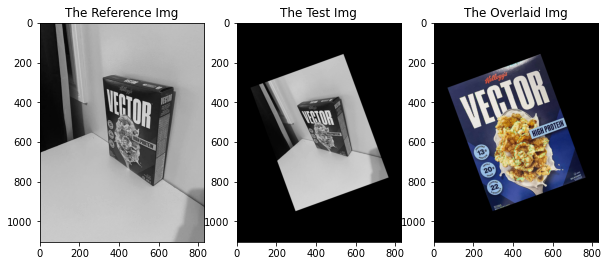

In [5]:
Affine_Transform(Images[3], "cereal.jpg")

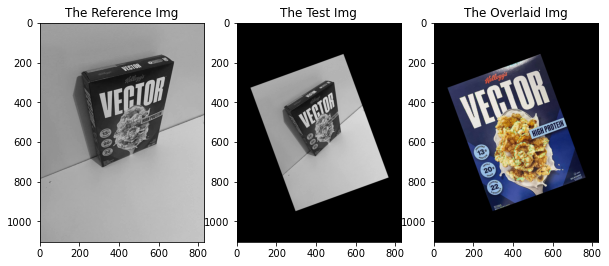

In [6]:
Affine_Transform(Images[4], "cereal.jpg")

In [7]:
#1.2 - Perspective Transform

def Perspective_Transform(Image, Testing_Image, picture): 
    KeyPoint, Descriptors, Found_Matches = Lowes_Matching(Image,Testing_Image)
    Points_Refernce = np.float32([KeyPoint[0][i.queryIdx].pt for i in Found_Matches]).reshape(-1,1,2)
    Points_image = np.float32([KeyPoint[1][i.trainIdx].pt for i in Found_Matches]).reshape(-1,1,2)
    HomoGraphy, Stage = cv2.findHomography(Points_Refernce, Points_image, cv2.RANSAC)
    New_Image = cv2.imread(picture)
    for j in range(New_Image.shape[1]): 
        for i in range(New_Image.shape[0]): 
            New_Image[i,j] = [New_Image[i,j][0] + 10, New_Image[i,j][1] + 10, New_Image[i,j][2] + 10]
            
    WarpPerspective_Image = cv2.warpPerspective(New_Image, HomoGraphy, (Testing_Image.shape[1], Testing_Image.shape[0]))
    Testing_Image = cv2.cvtColor(Testing_Image, cv2.COLOR_GRAY2RGB)
    WarpPerspective_Image = cv2.cvtColor(WarpPerspective_Image, cv2.COLOR_BGR2RGB)
  
    for i in range(WarpPerspective_Image.shape[1]): 
        for j in range(WarpPerspective_Image.shape[0]):
            if all(WarpPerspective_Image[j,i]) != True: 
                 WarpPerspective_Image[j,i] = Testing_Image[j,i]
    
    plot, PlotAxis = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    PlotAxis[0].set_title("The Reference Img")
    PlotAxis[0].imshow(Image, cmap = "gray")
    PlotAxis[1].set_title("The Test Img")
    PlotAxis[1].imshow(Testing_Image)
    PlotAxis[2].set_title("The Overlaid Img")
    PlotAxis[2].imshow(WarpPerspective_Image)
    
   



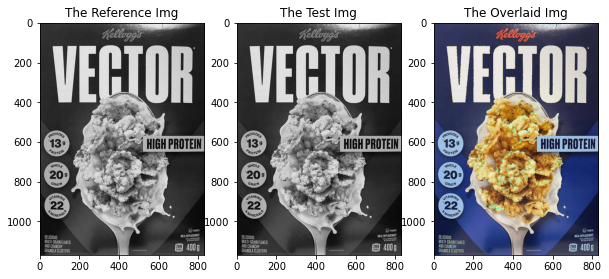

In [8]:
Perspective_Transform(Images[0], Images[0],"cereal.jpg")

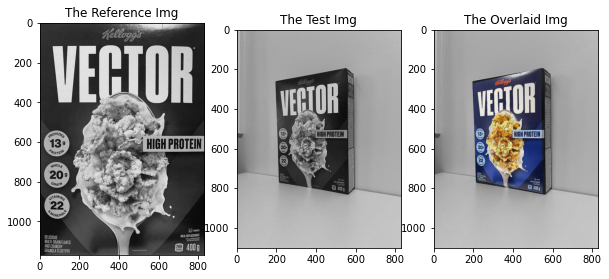

In [9]:
Perspective_Transform(Images[0], Images[1],"cereal.jpg")

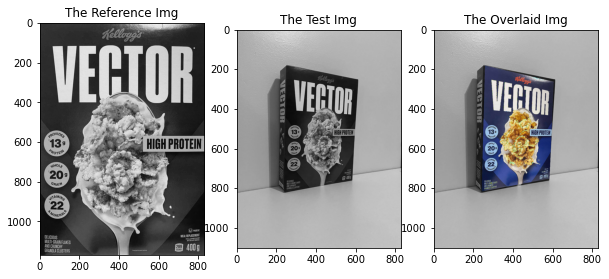

In [10]:
Perspective_Transform(Images[0], Images[2],"cereal.jpg")

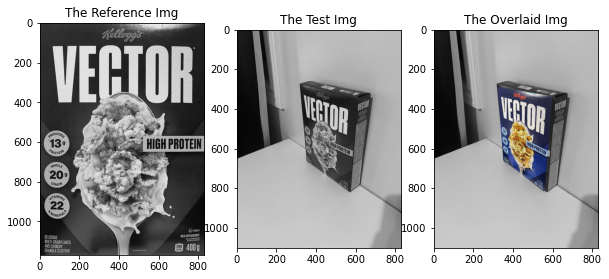

In [11]:
Perspective_Transform(Images[0], Images[3],"cereal.jpg")

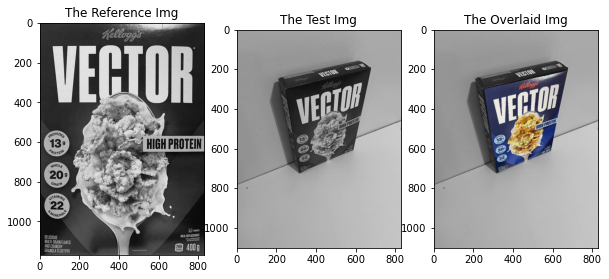

In [12]:
Perspective_Transform(Images[0], Images[4],"cereal.jpg")